# Draft analysis 

---

Group name:

---


## Introduction

*This section includes an introduction to the project motivation, data, and research question. Include a data dictionary* 

## Setup

In [115]:
%matplotlib inline

import pandas as pd
import altair as alt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## Data

## Import data

In [116]:
df = pd.read_csv("../data/interim/TransformedData",delimiter=",", index_col=0)

In [117]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


### Data structure

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(175), int64(13), object(7)
memory usage: 12.5+ MB


### Data corrections

In [119]:
cat_vars = [
    "gender", 
    "condtn",
    "match",
    "samerace",
    "age_o",
    "race_o",
    "dec_o",
    "met_o",
    "field_cd",
    "race",
    "zipcode",
    "goal",
    "date",
    "go_out",
    "career_c",
    "dec",
    "met",
    "length",
    "numdat_2",
    "date_3",
]

float_vars = [
    "int_corr",
    "pf_o_att",
    "pf_o_sin",
    "pf_o_int",
    "pf_o_fun",
    "pf_o_amb",
    "pf_o_sha",
    "income",
    "attr1_1",
    "sinc1_1",
    "intel1_1",
    "fun1_1",
    "amb1_1",
    "shar1_1",
    "attr4_1",
    "sinc4_1",
    "intel4_1",
    "fun4_1",
    "amb4_1",
    "shar4_1",
    "attr2_1",
    "sinc2_1",
    "intel2_1",
    "fun2_1",
    "amb2_1",
    "shar2_1"
]

int_vars = [
    "attr_o",
    "sinc_o",
    "intel_o",
    "fun_o",
    "amb_o",
    "shar_o",
    "like_o",
    "prob_o",
    "age",
    "imprace",
    "imprelig",
    "sports",
    "tvsports",
    "excersice",
    "dining",
    "museums",
    "art",
    "hiking",
    "gaming",
    "clubbing",
    "reading",
    "tv",
    "theater",
    "movies",
    "concerts",
    "music",
    "shopping",
    "yoga",
    "exhappy",
    "attr3_1",
    "sinc3_1",
    "intel3_1",
    "fun3_1",
    "amb3_1",
    "attr5_1",
    "sinc5_1",
    "intel5_1",
    "fun5_1",
    "amb5_1",
    "attr",
    "sinc",
    "intel",
    "fun",
    "amb",
    "shar",
    "like",
    "prob",
    "attr1_s",
    "sinc1_s",
    "intel1_s",
    "fun1_s",
    "amb1_s",
    "shar1_s",
    "attr4_s",
    "sinc4_s",
    "intel4_s",
    "fun4_s",
    "amb4_s",
    "satis_2",
    "iid",
    "id",
    "idg",
    "wave",
    "round",
    "order",
    "partner",
    "pid",
    "expnum",
    "you_call",
    "them_cal",
    "numdat_3",
    "num_in_3",
    "position",
    "positin1",
]

str_vars = [
    "field",
    "from",
    "career"
]

unused_vars = [
    "undergrd",
    "mn_sat",
    "tuition"
]

In [120]:
df[cat_vars]=df[cat_vars].astype("category",copy=False)
df[float_vars]=df[float_vars].astype("float",copy=False)
df[str_vars]=df[str_vars].astype("str",copy=False)

In [121]:
variables = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'prob','like']
df = df[variables]

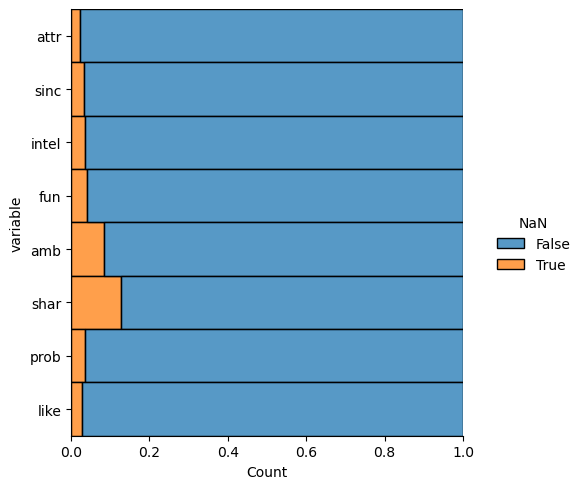

In [122]:
g=sns.displot(
    data=df.isna().melt(value_name="NaN"),
    y="variable",
    hue="NaN",
    multiple="fill",
)

Drop NAs

In [123]:
df.isna().sum()

attr      202
sinc      277
intel     296
fun       350
amb       712
shar     1067
prob      309
like      240
dtype: int64

In [124]:
df

,attr,sinc,intel,fun,amb,shar,prob,like
0,6.0,9.0,7.0,7.0,6.0,5.0,6.0,7.0
1,7.0,8.0,7.0,8.0,5.0,6.0,5.0,7.0
2,5.0,8.0,9.0,8.0,5.0,7.0,NaN,7.0
3,7.0,6.0,8.0,7.0,6.0,8.0,6.0,7.0
4,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...
8373,3.0,5.0,5.0,5.0,NaN,NaN,5.0,2.0
8374,4.0,6.0,8.0,4.0,4.0,NaN,4.0,4.0
8375,4.0,7.0,8.0,8.0,8.0,NaN,5.0,6.0
8376,4.0,6.0,5.0,4.0,NaN,5.0,5.0,5.0


In [125]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

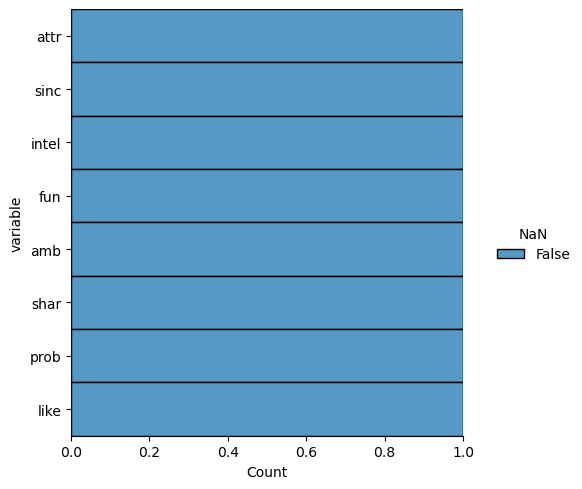

In [126]:
g=sns.displot(
    data=df.isna().melt(value_name="NaN"),
    y="variable",
    hue="NaN",
    multiple="fill",
)

### Variable lists

In [127]:
y_label = 'like'
features = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'prob']

X = df[features]
y = df[y_label]

### Data splitting

In [128]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=42)

## Analysis

### Descriptive statistics

In [129]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
attr,6963.0,6.192360,1.947634,0.0,5.0,6.0,8.0,10.0
sinc,6963.0,7.163004,1.741066,0.0,6.0,7.0,8.0,10.0
intel,6963.0,7.357748,1.556295,0.0,6.0,7.0,8.0,10.0
fun,6963.0,6.395376,1.954875,0.0,5.0,7.0,8.0,10.0
amb,6963.0,6.758940,1.793595,0.0,6.0,7.0,8.0,10.0
shar,6963.0,5.457633,2.144922,0.0,4.0,6.0,7.0,10.0
prob,6963.0,5.252836,2.142212,0.0,4.0,5.0,7.0,10.0
like,6963.0,6.130360,1.847802,0.0,5.0,6.0,7.0,10.0


### Exploratory data analysis

In [130]:
alt.Chart(df).mark_bar().encode(
    alt.X(alt.repeat("column"), type="quantitative", bin=True),
    y='count()',
).properties(
    width=150,
    height=150
).repeat(
    column=features
)

c:\Users\lukas\anaconda3\envs\stats\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.RepeatChart(...)

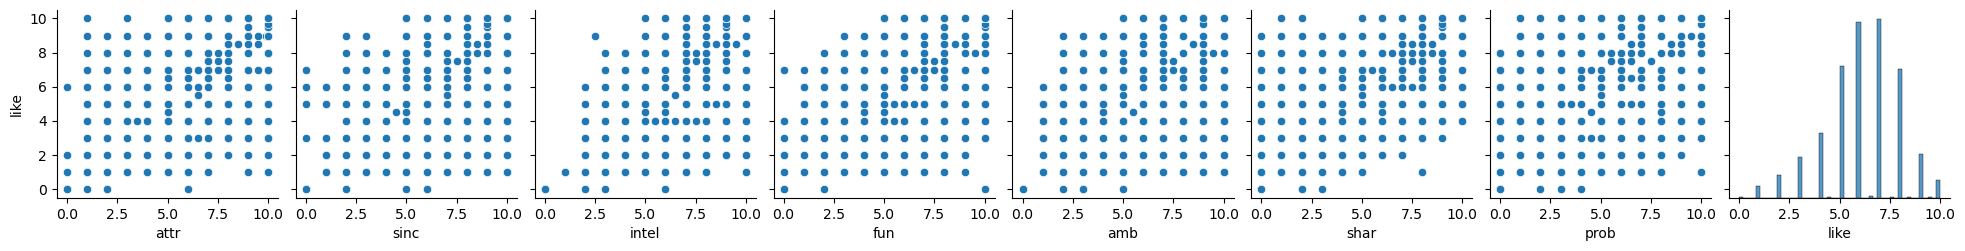

In [131]:
sns.pairplot(df, y_vars='like')

<AxesSubplot: >

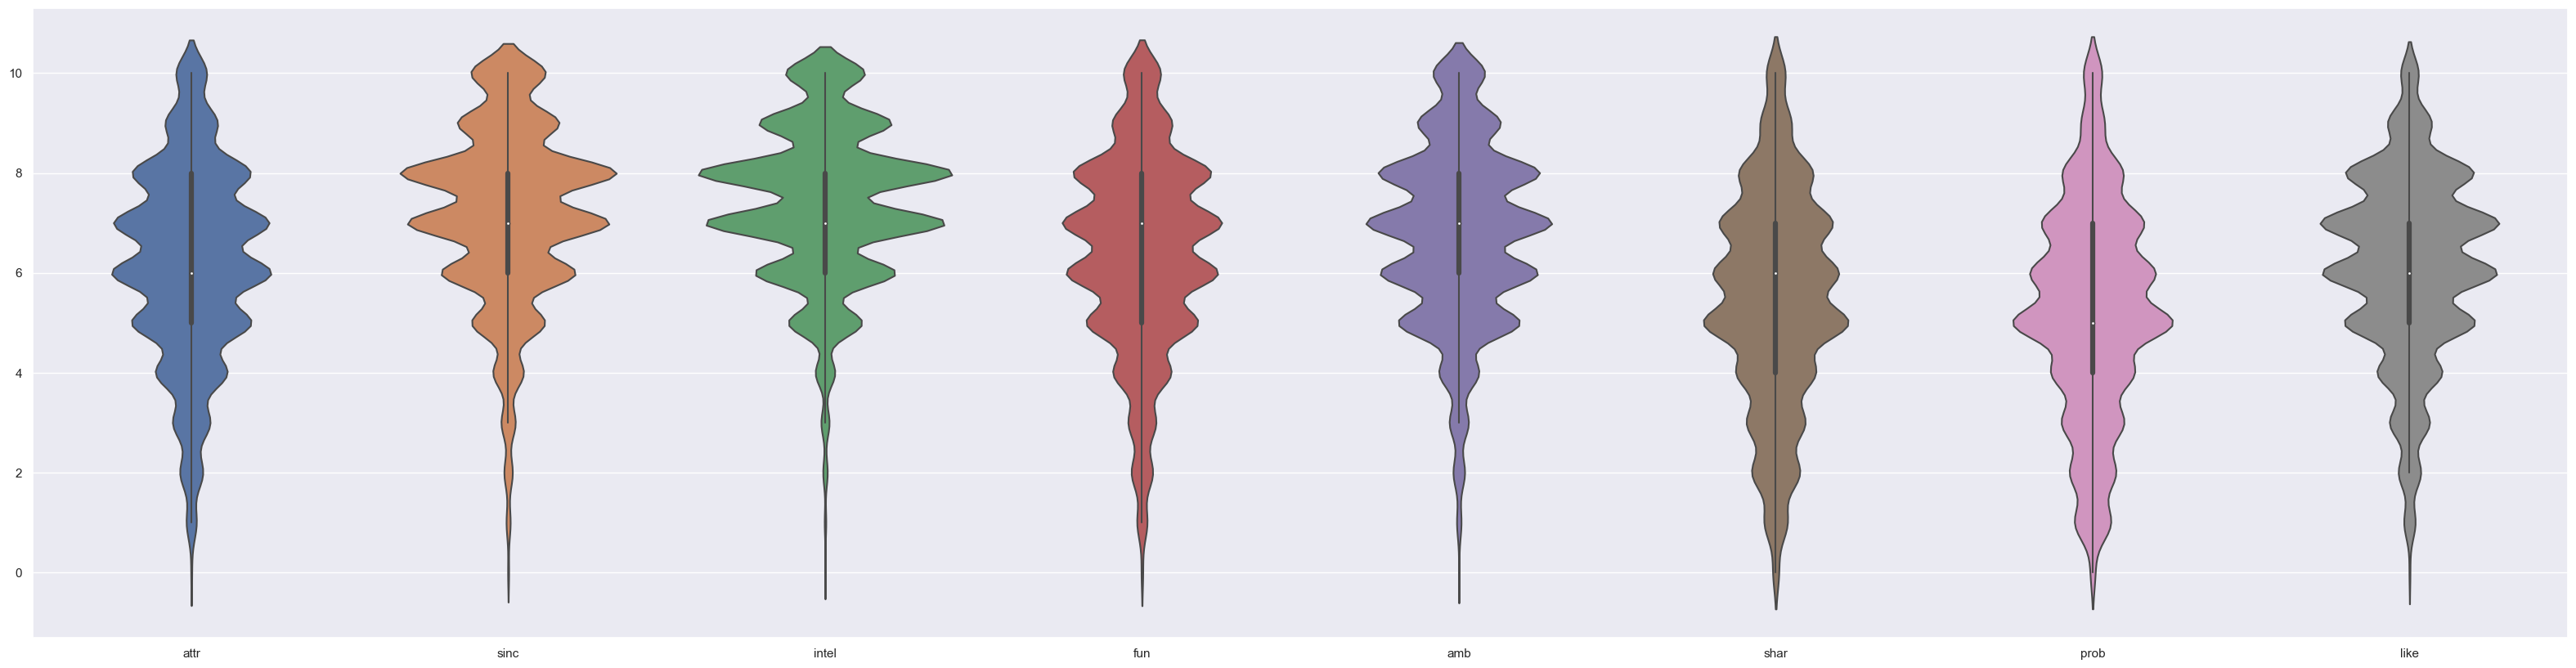

In [186]:
sns.violinplot(df)

<AxesSubplot: >

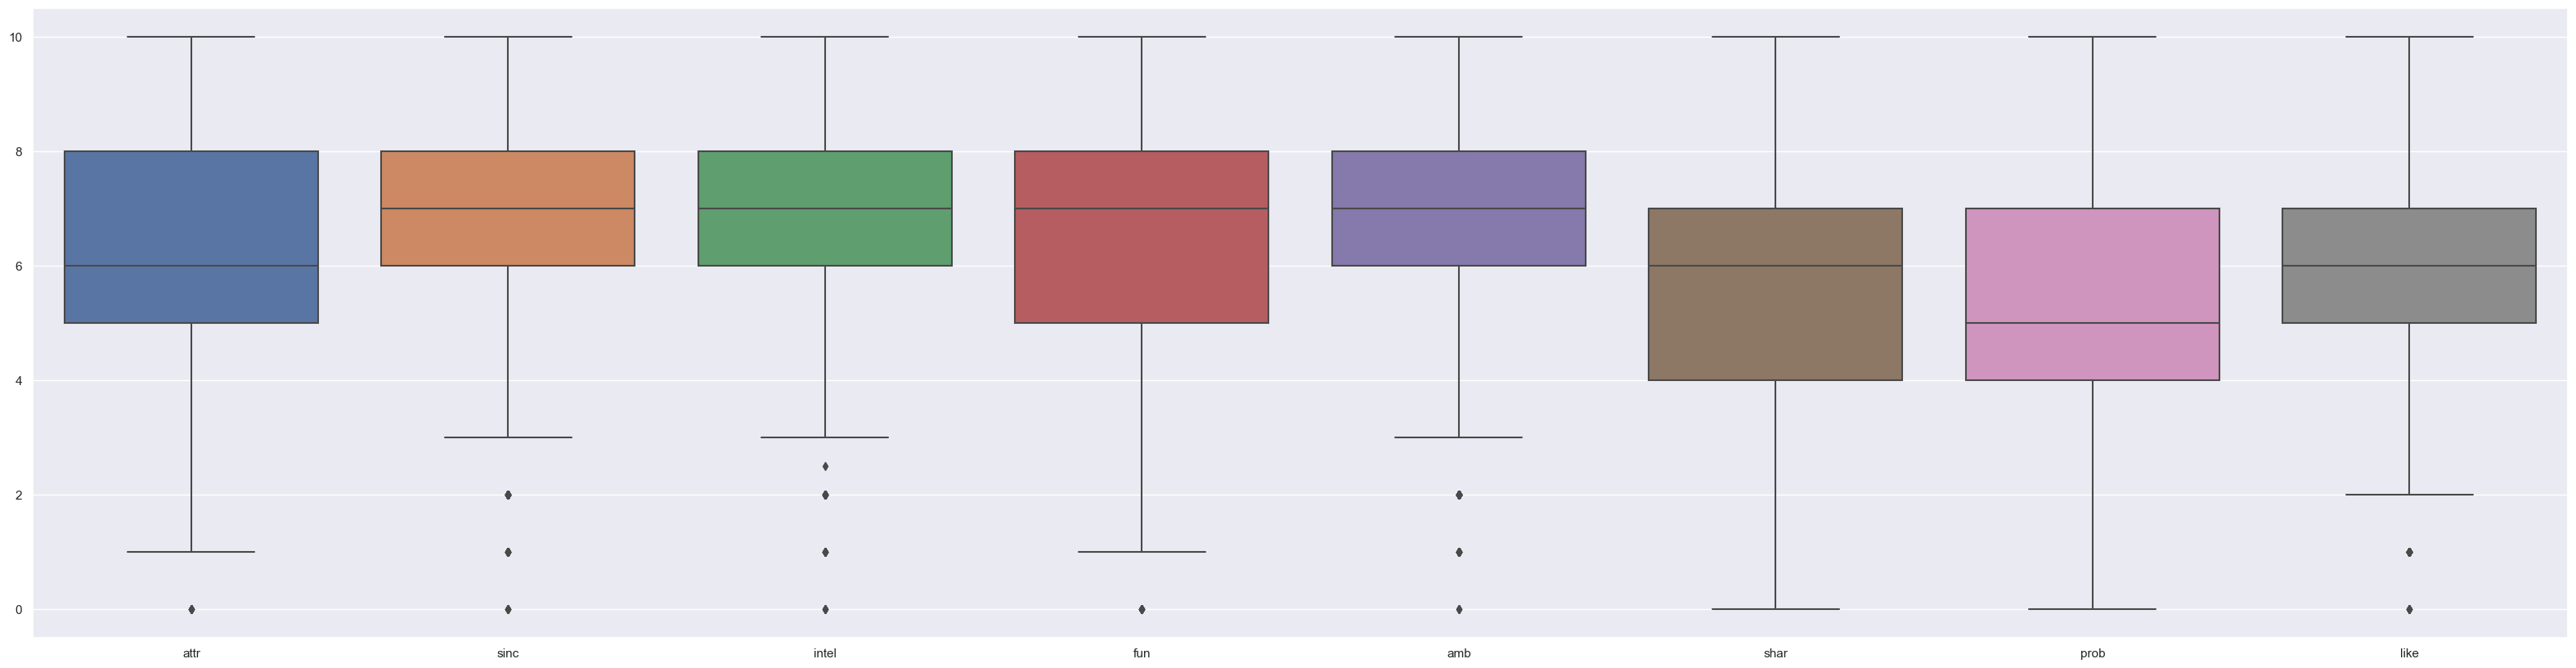

In [185]:
sns.boxplot(df)

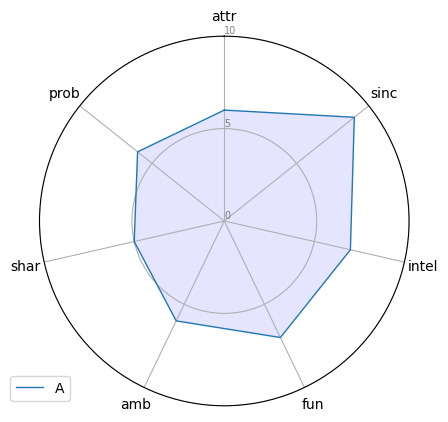

In [143]:
from math import pi

# number of variable
categories=list(data)
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,5,10], ["0","5","10"], color="grey", size=7)
plt.ylim(0,10)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1

data = df.drop(columns=['like'])

values=data.loc[0].values.flatten().tolist()
values += values[:1]

ax.plot(angles, values, linewidth=1, linestyle='solid', label="A")
ax.fill(angles, values, 'b', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

In [ ]:
plt1 = sns.lmplot(df, y='like', x='attr')
plt2 = sns.lmplot(df, y='like', x='sinc')
plt3 = sns.lmplot(df, y='like', x='intel')
plt4 = sns.lmplot(df, y='like', x='fun')
plt5 = sns.lmplot(df, y='like', x='amb')
plt6 = sns.lmplot(df, y='like', x='shar')
plt7 = sns.lmplot(df, y='like', x='prob')


### Relationships

In [ ]:
# inspect correlation between outcome and possible predictors
corr = df.corr()
corr['like'].sort_values(ascending=False)

In [ ]:
corr.style.background_gradient(cmap='Blues')

## Model

### Select model

In [ ]:
# select the linear regression model
reg = LinearRegression()

### Training and validation

### Fit model

In [ ]:
# Fit the model to the data
reg.fit(X, y)

### Evaluation on test set

### Save model



Save your model in the folder `models/`. Use a meaningful name and a timestamp.

## Conclusions